# COVID-19  DATA  ANALYSIS

In [24]:
import  pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("country_wise_latest.csv")
df


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


# Explore The Data

In [26]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [27]:
df.shape

(187, 15)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

# Data Cleaning

In [29]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

# Check Correlations

In [32]:
df = df.astype({ "Country/Region" : "category",
                  "WHO Region"  : "category", })

In [33]:
df.dtypes

Country/Region            category
Confirmed                    int64
Deaths                       int64
Recovered                    int64
Active                       int64
New cases                    int64
New deaths                   int64
New recovered                int64
Deaths / 100 Cases         float64
Recovered / 100 Cases      float64
Deaths / 100 Recovered     float64
Confirmed last week          int64
1 week change                int64
1 week % increase          float64
WHO Region                category
dtype: object

In [34]:
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [43]:
df.drop(['WHO Region'],axis=1,inplace=True)

In [44]:
df.drop(['Country/Region'],axis=1,inplace=True)

In [45]:
df.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


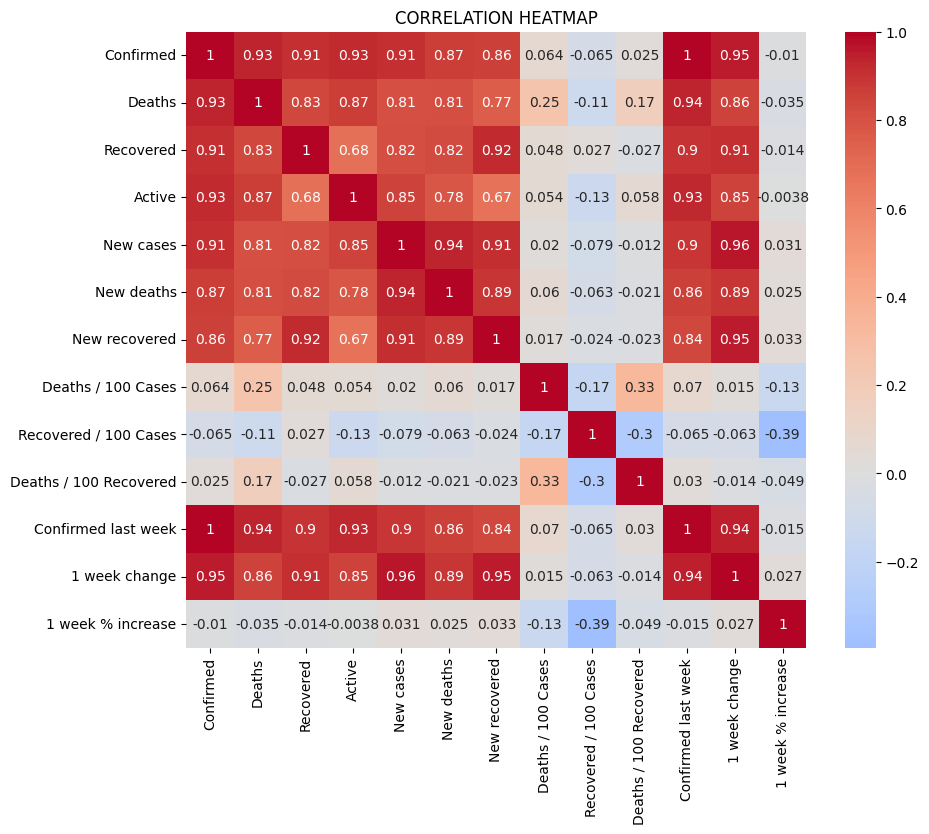

In [46]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm',center=0)
plt.title("CORRELATION HEATMAP")
plt.show()


# Data Analysis

In [47]:
 abs(df.corr())[['New cases']].style.background_gradient(cmap='Reds')

,New cases
Confirmed,0.909720
Deaths,0.806975
Recovered,0.818942
Active,0.851190
New cases,1.000000
New deaths,0.935947
New recovered,0.914765
Deaths / 100 Cases,0.020104
Recovered / 100 Cases,0.078666
Deaths / 100 Recovered,0.011637


In [36]:
covid_details = df[['Confirmed', 'Deaths', 'Recovered']].describe()
covid_details 



,Confirmed,Deaths,Recovered
count,1.870000e+02,187.000000,1.870000e+02
mean,8.813094e+04,3497.518717,5.063148e+04
std,3.833187e+05,14100.002482,1.901882e+05
min,1.000000e+01,0.000000,0.000000e+00
25%,1.114000e+03,18.500000,6.265000e+02
50%,5.059000e+03,108.000000,2.815000e+03
75%,4.046050e+04,734.000000,2.260600e+04
max,4.290259e+06,148011.000000,1.846641e+06


In [37]:
total_confirmed = df[ 'Confirmed'].sum()
total_death=df['Deaths'].sum()
total_recovered=df['Recovered'].sum()
total_active_cases=df['Active'].sum()
total_new_cases=df['New cases'].sum()
print("sum of total reported cases:",total_confirmed)
print("sum of total reported death :",total_death)
print("sum of total reported recoverd:",total_recovered)
print("sum of total active cases :",total_active_cases)
print("sum of total new cases:",total_new_cases)

sum of total reported cases: 16480485
sum of total reported death : 654036
sum of total reported recoverd: 9468087
sum of total active cases : 6358362
sum of total new cases: 228693


# Data Visualization

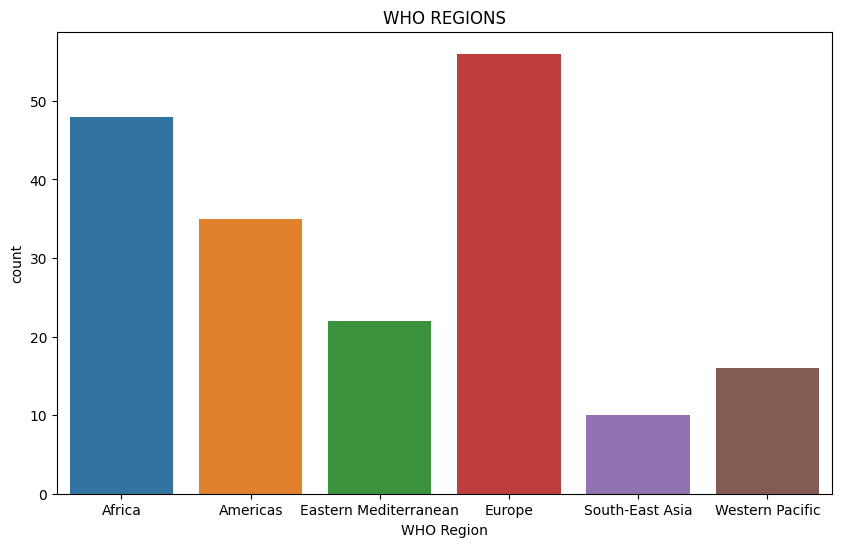

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='WHO Region',data=df)
plt.title("WHO REGIONS")
plt.show()


Text(0.5, 1.0, 'Total number of Confirmed, Deaths, Recovered and Active cases around the world')

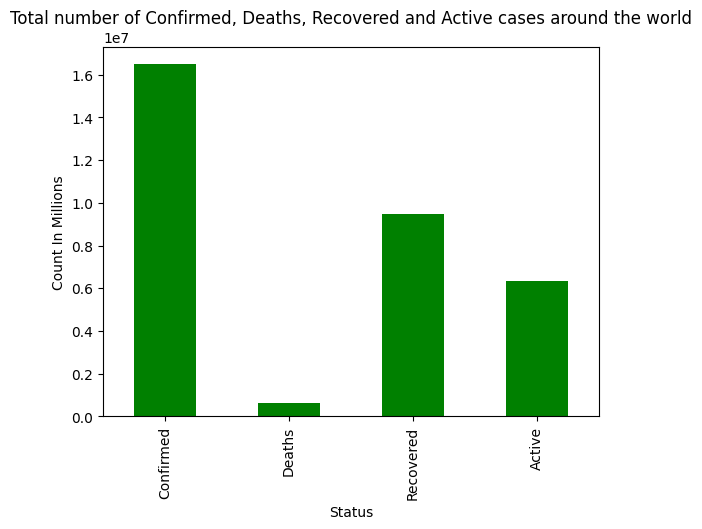

In [39]:
status_count = ['Confirmed', 'Deaths', 'Recovered', 'Active']
column_sums = df[status_count].sum().plot(kind='bar',color='Green')
plt.xlabel("Status")
plt.ylabel("Count In Millions")
plt.title("Total number of Confirmed, Deaths, Recovered and Active cases around the world")

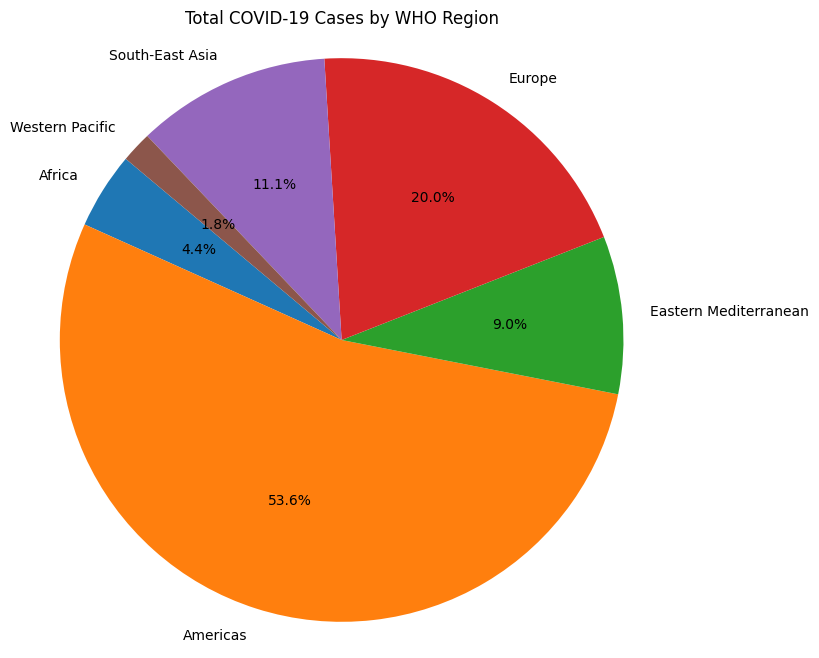

In [53]:
total_cases_by_region = df.groupby('WHO Region')['Confirmed'].sum()

plt.figure(figsize=(8, 8))
ax = plt.gca()
labels = total_cases_by_region.index
sizes = total_cases_by_region.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Total COVID-19 Cases by WHO Region')
plt.show()

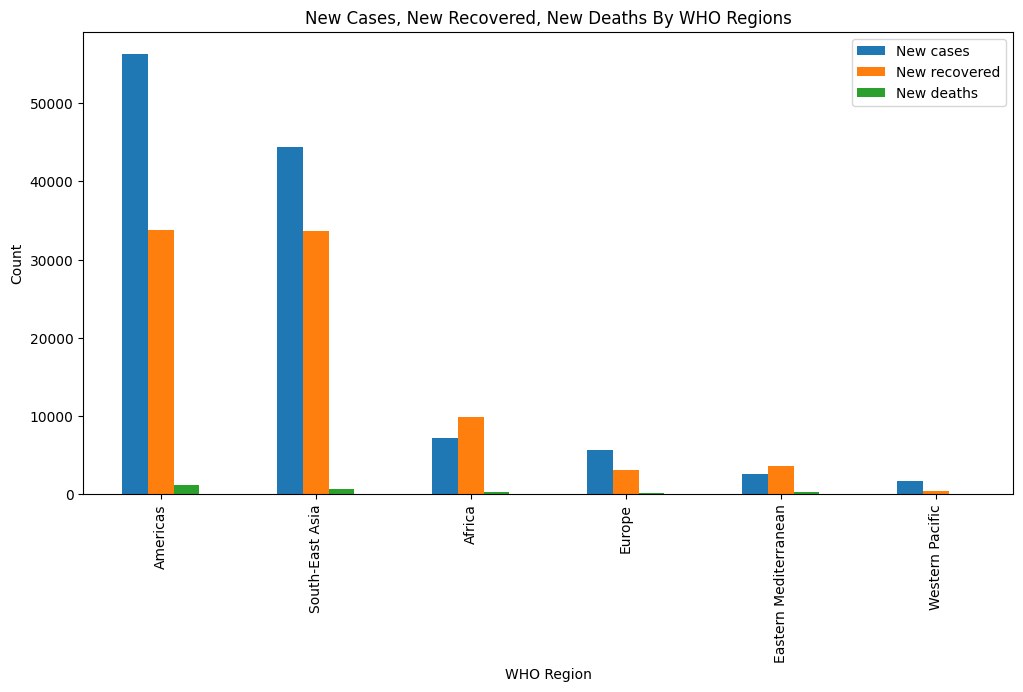

In [42]:
new_df = df[['WHO Region', 'New cases', 'New recovered', 'New deaths']]

grp_df = new_df.groupby('WHO Region').max()
sorted_df=grp_df.sort_values(by='New cases', ascending=False)
sorted_df.plot(kind='bar', figsize=(12, 6))
plt.title('New Cases, New Recovered, New Deaths By WHO Regions')
plt.xlabel('WHO Region')
plt.ylabel('Count')
plt.show()
